In [54]:
# Course : CS 513 - Knowledge Discovery and Data Mining
# Group Members: Branden Bulatao, Joseph Faustino, Natalie Fortes, Isabel Sutedjo
# Id : 20005971
# Purpose : Music Happiness Predictor - Predicts the happiness of music tracks based on various features.

# Main Author: Branden Bulatao

In [55]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
# Import dataset
df = pd.read_csv("./dataset.csv")

df.drop(
    df.columns[df.columns.str.contains("unnamed", case=False)], axis=1, inplace=True
)  # drop unnamed column

df.dropna(inplace=True)  # drop rows with null values

df["valence"] = df["valence"].astype("category")
df["valence"] = df["valence"].map(
    lambda x: 0 if x < 0.5 else 1
)  # sets valence to 0 if sad, 1 if happy

# Convert 'explicit' boolean to integer (0/1)
df["explicit"] = df["explicit"].astype(int)

# One-hot encode categorical features
df = pd.get_dummies(
    df, columns=["key", "time_signature", "track_genre"], drop_first=True
)

# X = df.drop(['track_id', 'artists', 'album_name', 'track_name', 'valence'], axis=1)
X = df.drop(
    ["track_id", "artists", "album_name", "track_name", "valence", "duration_ms"],
    axis=1,
)
y = df["valence"]

# Identify numeric features to scale
numeric_features = [
    # "duration_ms",
    # "popularity",
    # "tempo",
    # "loudness",
    "danceability",
    "energy",
    "speechiness",
    "acousticness",
    "instrumentalness",
    "liveness",
]

numeric_high_value_features = [
    "popularity",
    "tempo",
    "loudness",
]

# All other features (binary or one-hot) are left as-is
non_scaled_features = [
    col
    for col in X.columns
    if col not in (numeric_features + numeric_high_value_features)
]
# non_scaled_features = [col for col in X.columns if col not in numeric_high_value_features]

# ColumnTransformer for selective scaling
preprocessor = ColumnTransformer(
    transformers=[
        # ("num", StandardScaler(), numeric_features),
        ("num", "passthrough", numeric_features),
        ("num2", MinMaxScaler(), numeric_high_value_features),
        ("pass", "passthrough", non_scaled_features),
    ]
)

# Fit and transform the data
X_processed = preprocessor.fit_transform(X)

# Reconstruct a DataFrame (optional, for inspection/debugging)
final_features = numeric_features + numeric_high_value_features + non_scaled_features
X_processed = pd.DataFrame(X_processed, columns=final_features)
# X_processed = X_processed.apply(pd.to_numeric)  # <-- this line fixes your problem

# Train the code
attr_train, attr_test, target_train, target_test = train_test_split(
    X_processed, y, test_size=0.3, random_state=42
)

In [57]:
# Train Naive Bayes model
model = GaussianNB()
model.fit(attr_train, target_train)

# Make Prediction
target_pred = model.predict(attr_test)

In [58]:
# Evaluate model
accuracy = accuracy_score(target_test, target_pred)
conf_matrix = confusion_matrix(target_test, target_pred)
class_report = classification_report(target_test, target_pred)

# Print results
print(f"Accuracy: {accuracy:.4f}")
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

Accuracy: 0.6932

Confusion Matrix:
 [[8121 4215]
 [2780 7684]]

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.66      0.70     12336
           1       0.65      0.73      0.69     10464

    accuracy                           0.69     22800
   macro avg       0.70      0.70      0.69     22800
weighted avg       0.70      0.69      0.69     22800



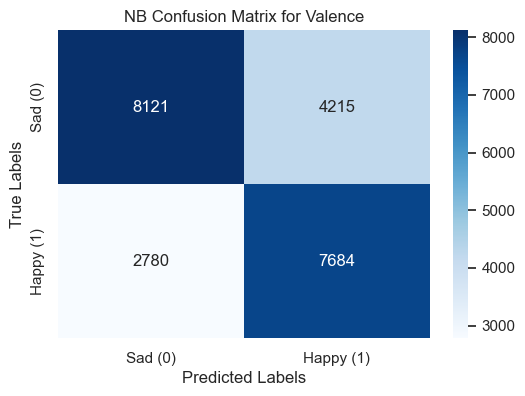

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix
cm = confusion_matrix(target_test, target_pred)

# Create the heatmap
plt.figure(figsize=(6, 4))
ax = plt.subplot()
sns.heatmap(cm, annot=True, fmt="g", cmap="Blues", ax=ax)

# Labels, title, and ticks
ax.set_xlabel("Predicted Labels")
ax.set_ylabel("True Labels")
ax.set_title("NB Confusion Matrix for Valence")
ax.xaxis.set_ticklabels(["Sad (0)", "Happy (1)"])
ax.yaxis.set_ticklabels(["Sad (0)", "Happy (1)"])

plt.show()

In [60]:
test_actual = attr_test  # Copy attr_test
test_actual["target_pred"] = target_pred  # Create new column for prediction values
test_actual["test_actual"] = target_test  # Create new column for actual values
# test_actual.head()  # Show table

false_positives = test_actual[
    (test_actual["target_pred"] == 1) & (test_actual["test_actual"] == 0)
]

false_negatives = test_actual[
    (test_actual["target_pred"] == 0) & (test_actual["test_actual"] == 1)
]

true_positives = test_actual[
    (test_actual["target_pred"] == 1) & (test_actual["test_actual"] == 1)
]

true_negatives = test_actual[
    (test_actual["target_pred"] == 0) & (test_actual["test_actual"] == 0)
]

print(false_positives)
print(false_negatives)
# false_positives.describe()

      danceability energy speechiness acousticness instrumentalness liveness  \
19261        0.469  0.183      0.0407        0.829              0.0     0.71   
115          0.633  0.299      0.0353        0.833              0.0    0.109   
88580        0.786  0.696       0.352        0.183              0.0    0.123   
60735        0.911  0.616       0.272        0.569          0.00795    0.154   
3241         0.416  0.964       0.112     0.000023         0.000875    0.473   
...            ...    ...         ...          ...              ...      ...   
13826        0.721  0.981      0.0554     0.000283            0.855   0.0669   
9146          0.56  0.449      0.0282          0.6         0.000014    0.638   
53113          0.6  0.529      0.0277        0.239         0.000023    0.099   
61543        0.598  0.912      0.0493        0.266              0.0    0.316   
62049        0.497  0.374       0.028        0.751         0.000058    0.118   

      popularity     tempo  loudness ex

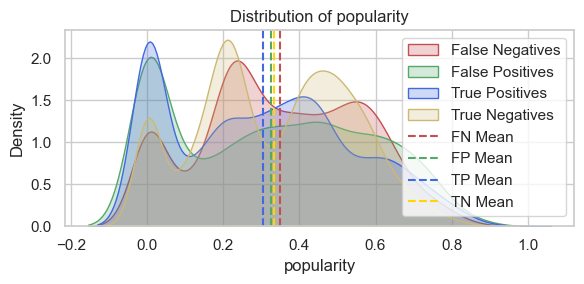

Stats for 'popularity':
  False Negatives - mean: 0.3494, std: 0.2107
  False Positives - mean: 0.3250, std: 0.2518
  True Positives  - mean: 0.3051, std: 0.2344
  True Negatives  - mean: 0.3328, std: 0.2008
------------------------------------------------------------


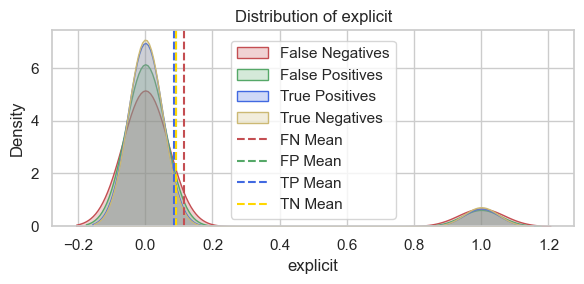

Stats for 'explicit':
  False Negatives - mean: 0.1145, std: 0.3186
  False Positives - mean: 0.0912, std: 0.2880
  True Positives  - mean: 0.0870, std: 0.2818
  True Negatives  - mean: 0.0921, std: 0.2892
------------------------------------------------------------


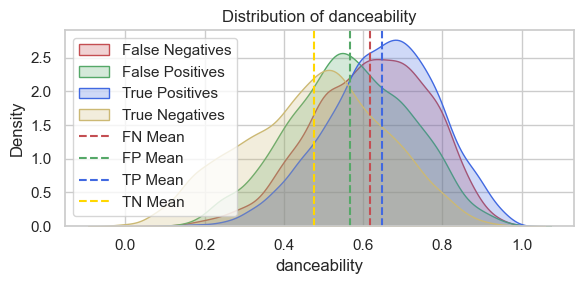

Stats for 'danceability':
  False Negatives - mean: 0.6180, std: 0.1457
  False Positives - mean: 0.5662, std: 0.1522
  True Positives  - mean: 0.6474, std: 0.1401
  True Negatives  - mean: 0.4766, std: 0.1767
------------------------------------------------------------


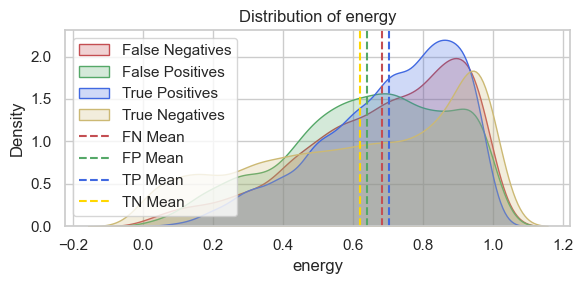

Stats for 'energy':
  False Negatives - mean: 0.6837, std: 0.2271
  False Positives - mean: 0.6410, std: 0.2290
  True Positives  - mean: 0.7027, std: 0.1952
  True Negatives  - mean: 0.6197, std: 0.2944
------------------------------------------------------------


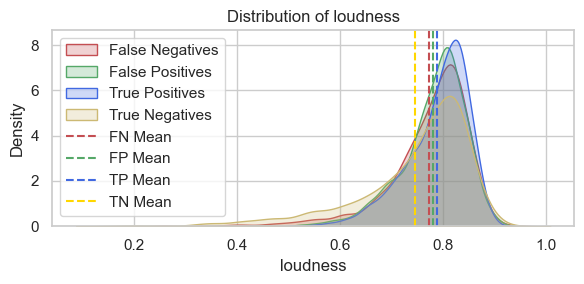

Stats for 'loudness':
  False Negatives - mean: 0.7722, std: 0.0809
  False Positives - mean: 0.7804, std: 0.0644
  True Positives  - mean: 0.7887, std: 0.0614
  True Negatives  - mean: 0.7452, std: 0.1129
------------------------------------------------------------


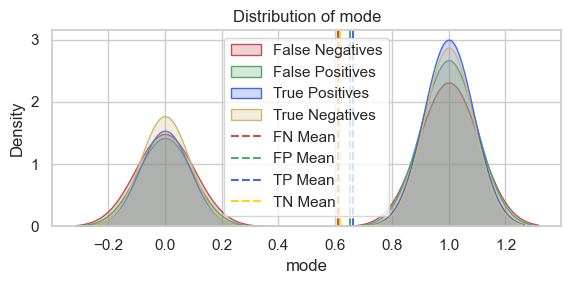

Stats for 'mode':
  False Negatives - mean: 0.6092, std: 0.4880
  False Positives - mean: 0.6531, std: 0.4761
  True Positives  - mean: 0.6614, std: 0.4733
  True Negatives  - mean: 0.6186, std: 0.4858
------------------------------------------------------------


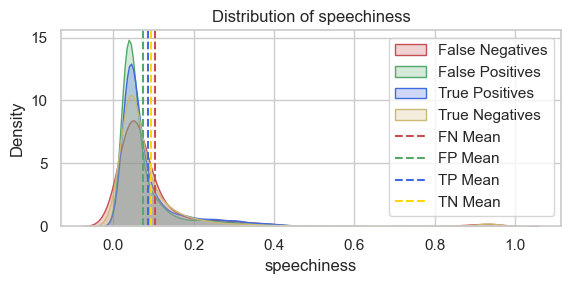

Stats for 'speechiness':
  False Negatives - mean: 0.1042, std: 0.1511
  False Positives - mean: 0.0746, std: 0.0784
  True Positives  - mean: 0.0871, std: 0.0912
  True Negatives  - mean: 0.0939, std: 0.1370
------------------------------------------------------------


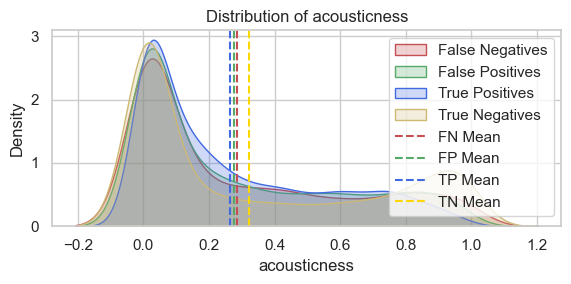

Stats for 'acousticness':
  False Negatives - mean: 0.2843, std: 0.3211
  False Positives - mean: 0.2775, std: 0.3074
  True Positives  - mean: 0.2638, std: 0.2768
  True Negatives  - mean: 0.3225, std: 0.3701
------------------------------------------------------------


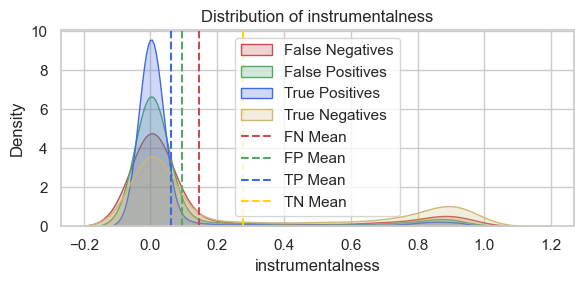

Stats for 'instrumentalness':
  False Negatives - mean: 0.1458, std: 0.2960
  False Positives - mean: 0.0943, std: 0.2411
  True Positives  - mean: 0.0612, std: 0.1950
  True Negatives  - mean: 0.2764, std: 0.3743
------------------------------------------------------------


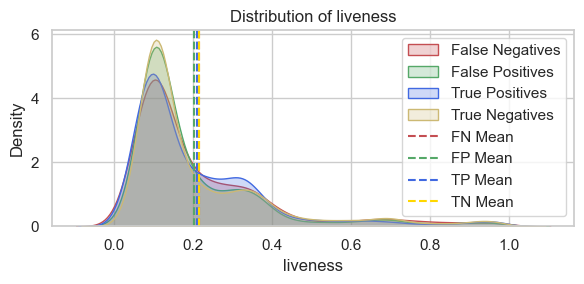

Stats for 'liveness':
  False Negatives - mean: 0.2153, std: 0.1874
  False Positives - mean: 0.2011, std: 0.1750
  True Positives  - mean: 0.2098, std: 0.1799
  True Negatives  - mean: 0.2142, std: 0.1876
------------------------------------------------------------


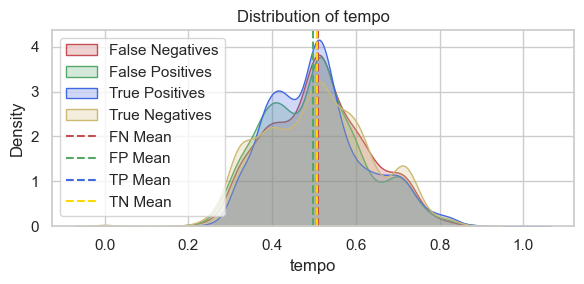

Stats for 'tempo':
  False Negatives - mean: 0.5102, std: 0.1174
  False Positives - mean: 0.4988, std: 0.1193
  True Positives  - mean: 0.5067, std: 0.1157
  True Negatives  - mean: 0.5073, std: 0.1291
------------------------------------------------------------


In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

df_no_genres = df.loc[:, ~df.columns.str.contains("track_genre")]

feature_cols = [
    col
    for col in df_no_genres.columns
    if col
    not in [
        "target_actual",
        "target_pred",
        "track_id",
        "artists",
        "album_name",
        "track_name",
        "valence",
    ]
]

KF_df = df.drop(columns="valence")
for col in df_no_genres.select_dtypes(include=["float", "int"]).columns:
    if col == "valence" or col == "duration_ms": continue
   
    plt.figure(figsize=(6, 3))

    # KDE plots
    sns.kdeplot(false_negatives[col], label="False Negatives", fill=True, color="r")
    sns.kdeplot(false_positives[col], label="False Positives", fill=True, color="g")
    sns.kdeplot(
        true_positives[col], label="True Positives", fill=True, color="royalblue"
    )
    sns.kdeplot(true_negatives[col], label="True Negatives", fill=True, color="y")

    # Vertical lines for means
    plt.axvline(false_negatives[col].mean(), color="r", linestyle="--", label="FN Mean")
    plt.axvline(false_positives[col].mean(), color="g", linestyle="--", label="FP Mean")
    plt.axvline(
        true_positives[col].mean(), color="royalblue", linestyle="--", label="TP Mean"
    )
    plt.axvline(
        true_negatives[col].mean(), color="gold", linestyle="--", label="TN Mean"
    )

    plt.title(f"Distribution of {col}")
    plt.legend()
    plt.tight_layout()
    plt.show()

    print(f"Stats for '{col}':")
    print(
        f"  False Negatives - mean: {false_negatives[col].mean():.4f}, std: {false_negatives[col].std():.4f}"
    )
    print(
        f"  False Positives - mean: {false_positives[col].mean():.4f}, std: {false_positives[col].std():.4f}"
    )
    print(
        f"  True Positives  - mean: {true_positives[col].mean():.4f}, std: {true_positives[col].std():.4f}"
    )
    print(
        f"  True Negatives  - mean: {true_negatives[col].mean():.4f}, std: {true_negatives[col].std():.4f}"
    )
    print("-" * 60)

['popularity', 'explicit', 'danceability', 'energy', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'tempo', 'key_1', 'key_2', 'key_3', 'key_4', 'key_5', 'key_6', 'key_7', 'key_8', 'key_9', 'key_10', 'key_11', 'time_signature_1', 'time_signature_3', 'time_signature_4', 'time_signature_5']
------------------------------------------------------------
1) Heatmap of feature means per outcome
------------------------------------------------------------


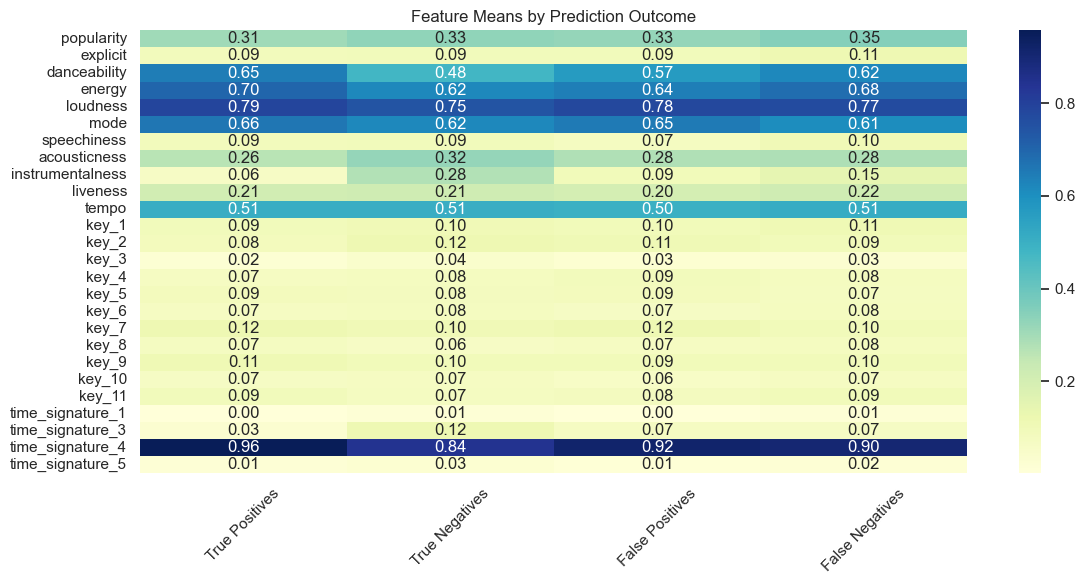

------------------------------------------------------------
2) Bar Plots of each feature
------------------------------------------------------------
instrumentalness std deviation:  0.09460810965543708


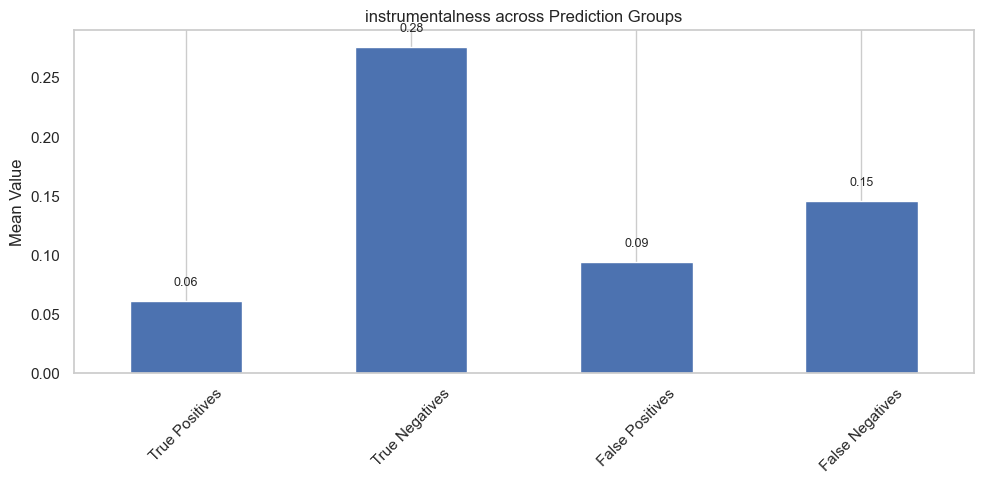

danceability std deviation:  0.07491067123787898


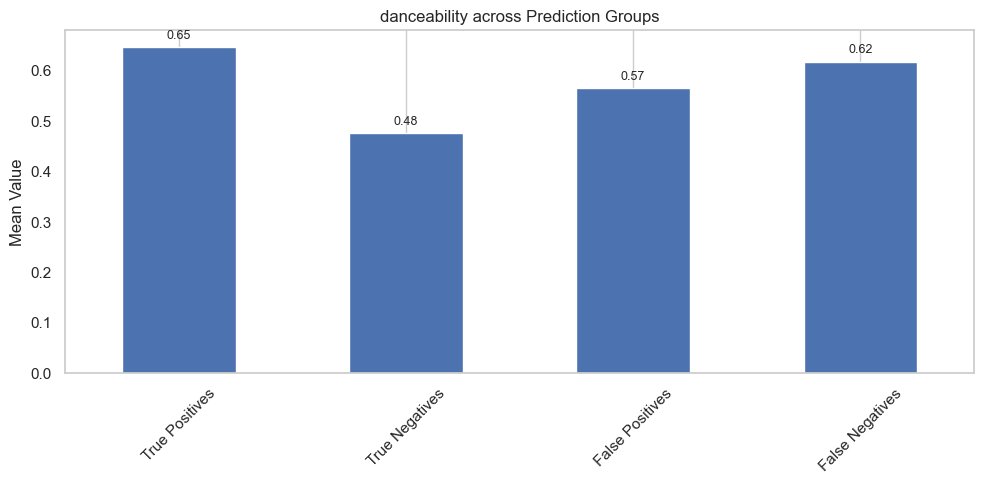

time_signature_4 std deviation:  0.04701237309702766


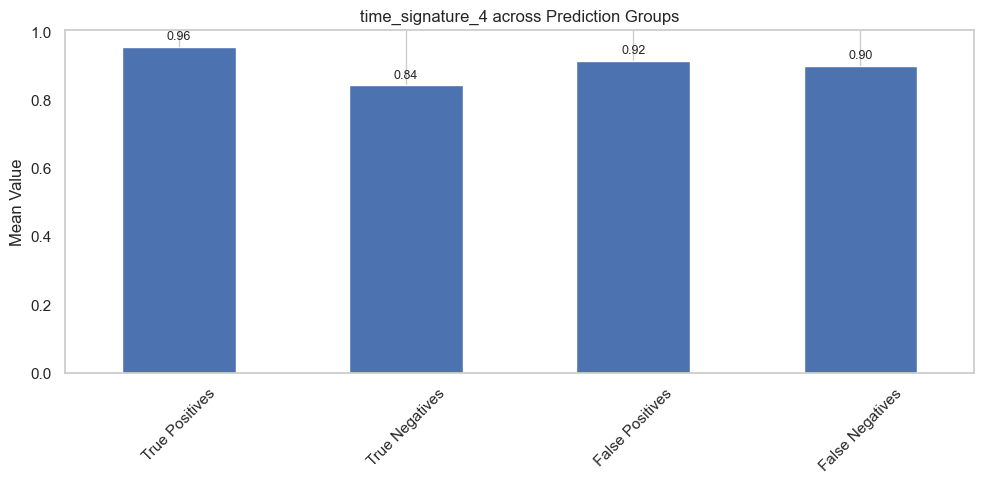

energy std deviation:  0.038129995886701865


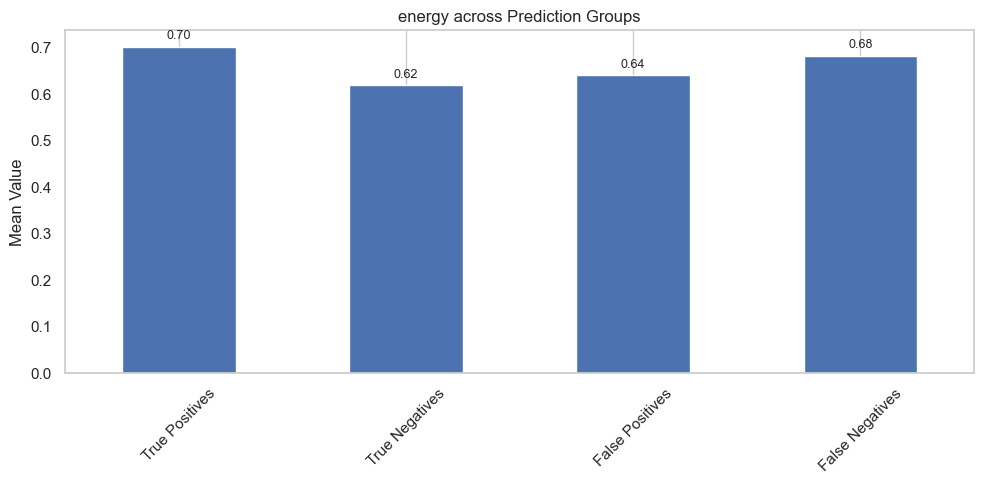

time_signature_3 std deviation:  0.03565085477164708


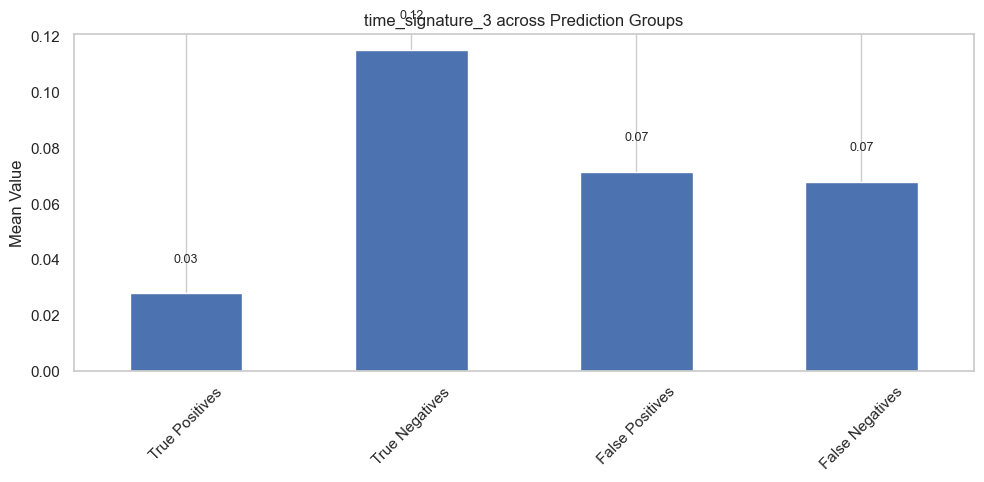

mode std deviation:  0.025522612712836287


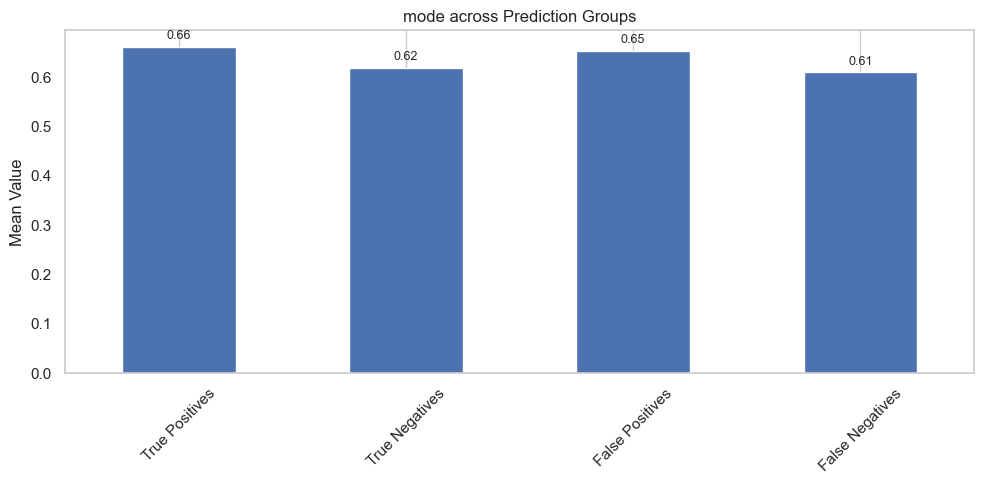

acousticness std deviation:  0.025149011728679567


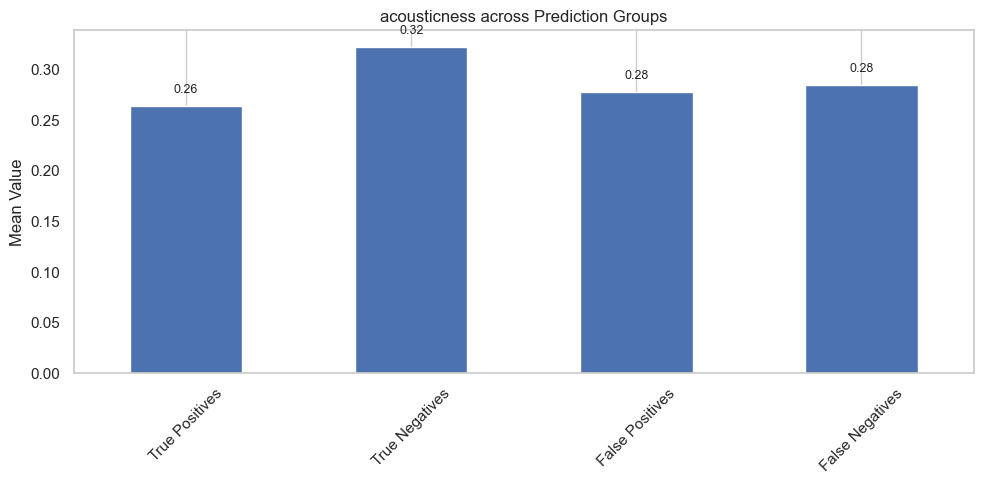

loudness std deviation:  0.018886923942747512


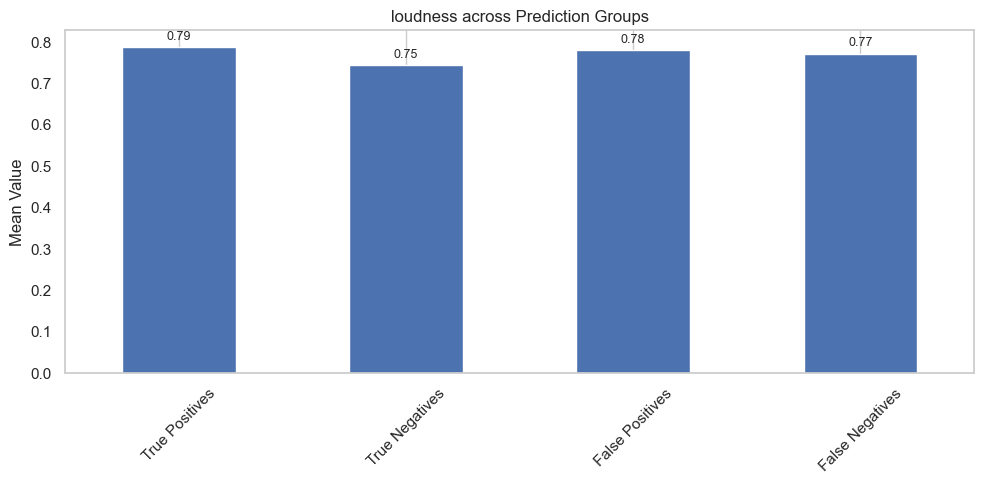

popularity std deviation:  0.018399393644590464


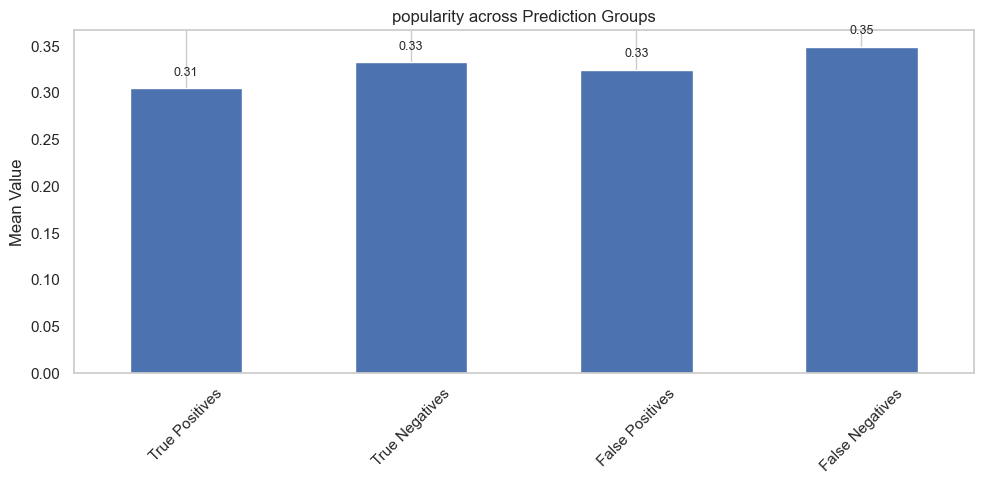

key_2 std deviation:  0.014107546264721755


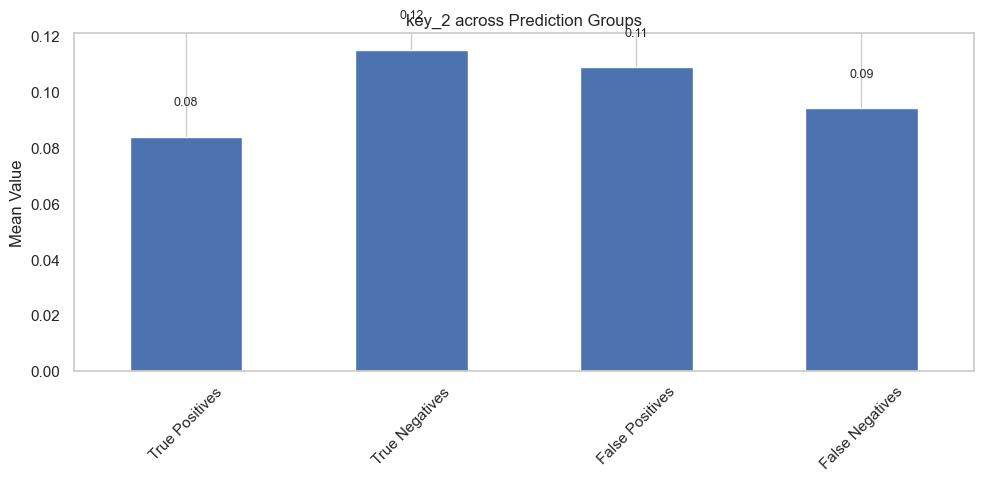

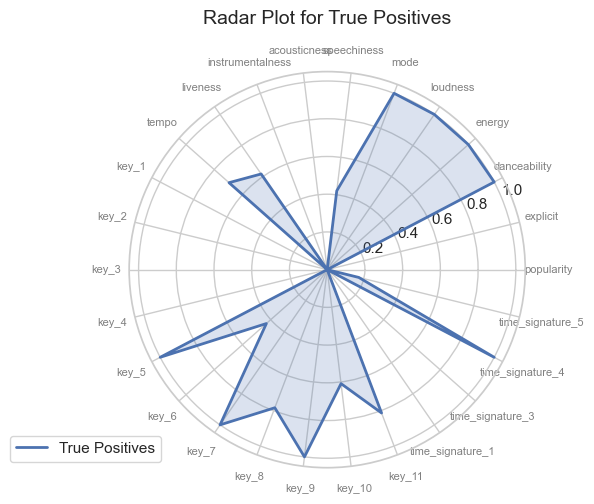

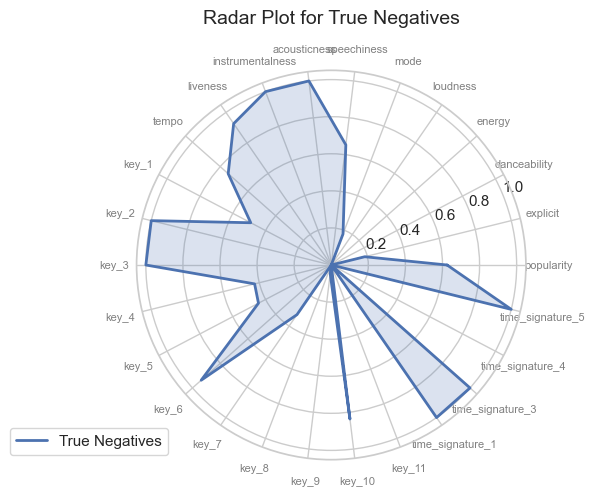

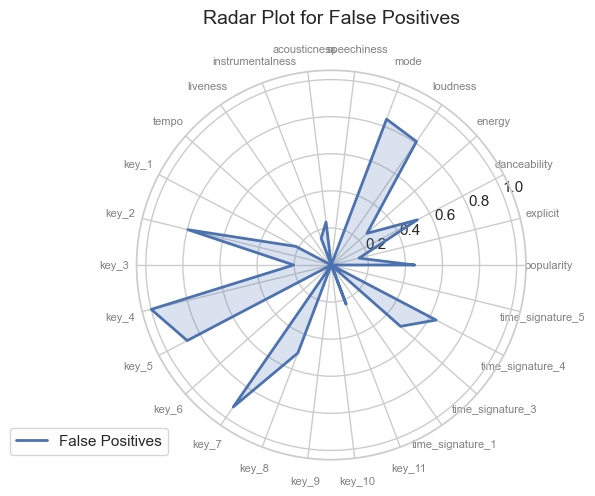

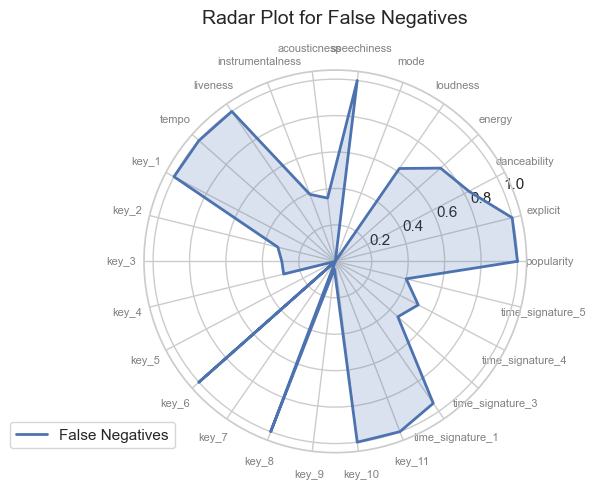

In [62]:
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 5)

df_no_genres = df.loc[:, ~df.columns.str.contains("track_genre")]

# Features only (adjust as needed)
feature_cols = [
    col
    for col in df_no_genres.columns
    if col
    not in [
        "target_actual",
        "target_pred",
        "track_id",
        "artists",
        "album_name",
        "track_name",
        "valence",
        "duration_ms",
    ]
]

print(feature_cols)

# Mean summary per category
summary_df = pd.DataFrame(
    {
        "True Positives": true_positives[feature_cols].mean(),
        "True Negatives": true_negatives[feature_cols].mean(),
        "False Positives": false_positives[feature_cols].mean(),
        "False Negatives": false_negatives[feature_cols].mean(),
        # "All Data": df[feature_cols].mean(),
    }
)

# Transpose for easier plotting
summary_df = summary_df.astype(float)
summary_df = summary_df.T

# Optional: Normalize columns for radar/spider-style plots
summary_norm = (summary_df - summary_df.min()) / (summary_df.max() - summary_df.min())

# --- Plot 1: Heatmap of Means per Outcome Type ---
print("-" * 60)
print("1) Heatmap of feature means per outcome")
print("-" * 60)

plt.figure(figsize=(12, 6))
sns.heatmap(summary_df.T, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("Feature Means by Prediction Outcome")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# --- Plot 2: Comparison Bar Plot for One Feature at a Time ---
# Choose top 5 most differing features (by std deviation across groups)
print("-" * 60)
print("2) Bar Plots of each feature")
print("-" * 60)

top_diff_features = summary_df.std().sort_values(ascending=False).head(10).index

for feature in top_diff_features:
    print(feature + " std deviation: ", summary_df[feature].std())

    ax = summary_df[feature].plot(
        kind="bar", title=f"{feature} across Prediction Groups", ylabel="Mean Value"
    )

    # Add value labels above each bar
    for i, value in enumerate(summary_df[feature]):
        ax.text(i, value + 0.01, f"{value:.2f}", ha="center", va="bottom", fontsize=9)

    plt.xticks(rotation=45)
    plt.grid(axis="y")
    plt.tight_layout()
    plt.show()

# --- Plot 3: Radar Plot  ---
try:
    from math import pi

    categories = list(summary_norm.columns)
    groups = summary_norm.index

    for group in groups:
        values = summary_norm.loc[group].tolist()
        values += values[:1]  # repeat the first value to close the circle

        angles = [n / float(len(categories)) * 2 * pi for n in range(len(categories))]
        angles += angles[:1]

        plt.figure(figsize=(6, 6))
        ax = plt.subplot(111, polar=True)
        plt.xticks(angles[:-1], categories, color="grey", size=8)

        ax.plot(angles, values, linewidth=2, linestyle="solid", label=group)
        ax.fill(angles, values, alpha=0.2)

        plt.title(f"Radar Plot for {group}", size=14, y=1.1)
        plt.legend(loc="upper right", bbox_to_anchor=(0.1, 0.1))
        plt.tight_layout()
        plt.show()
except ImportError:
    print("Radar plot skipped (requires polar plotting support).")

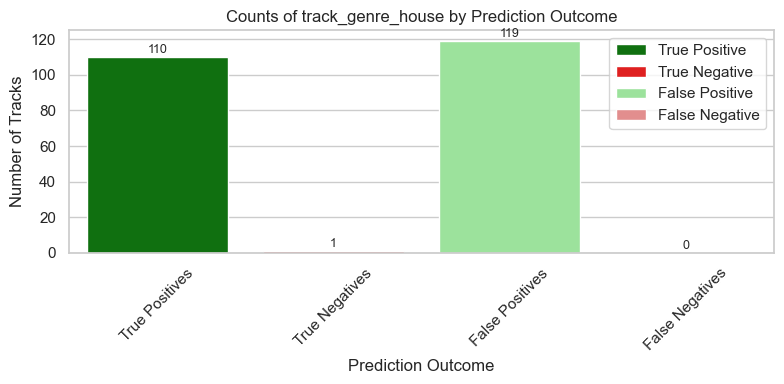

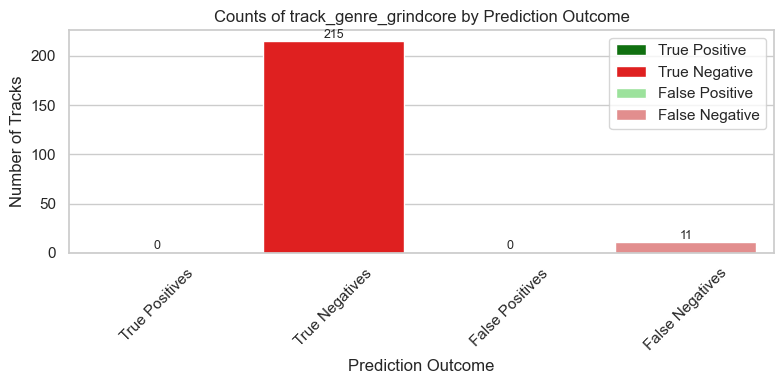

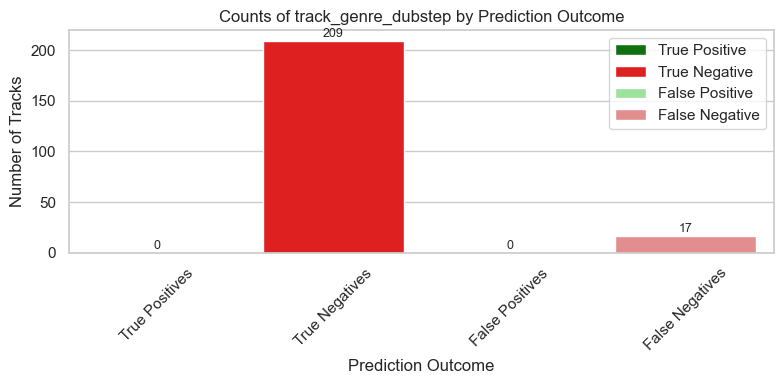

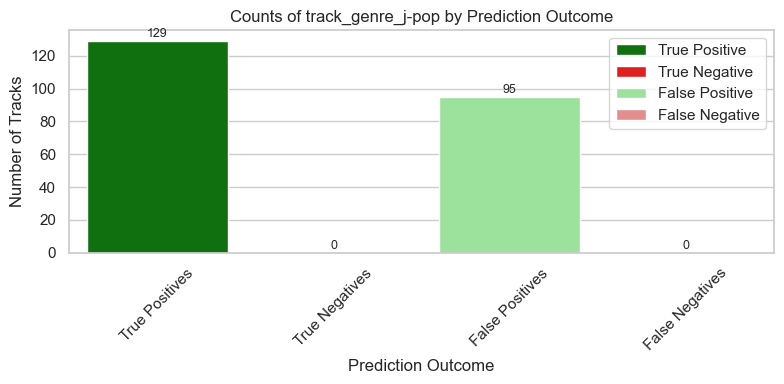

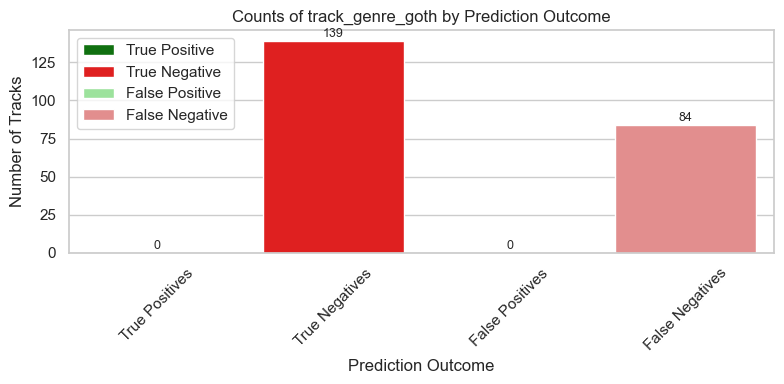

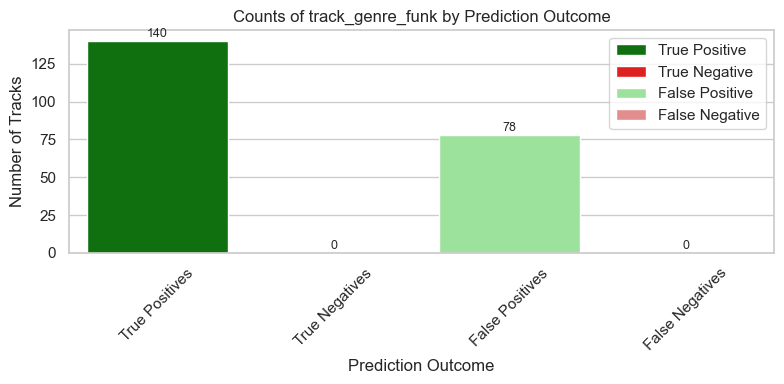

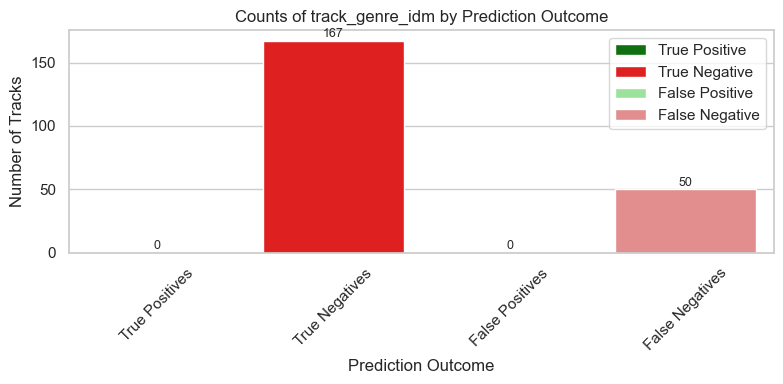

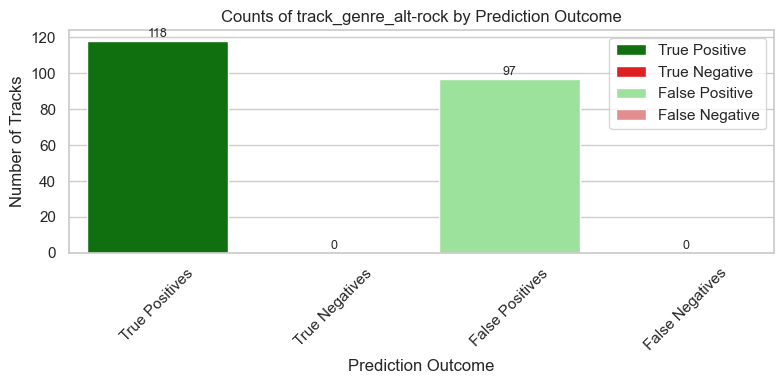

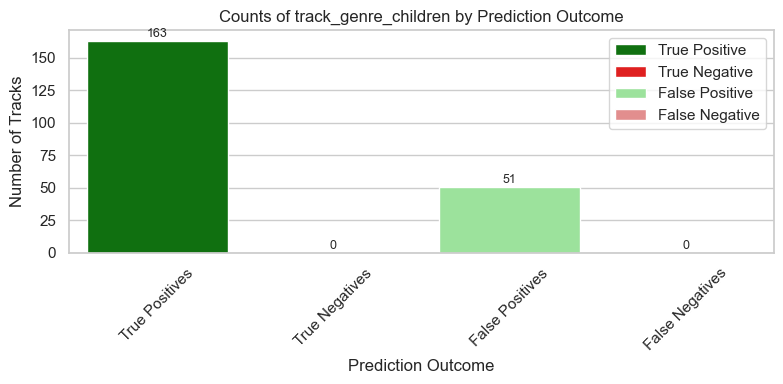

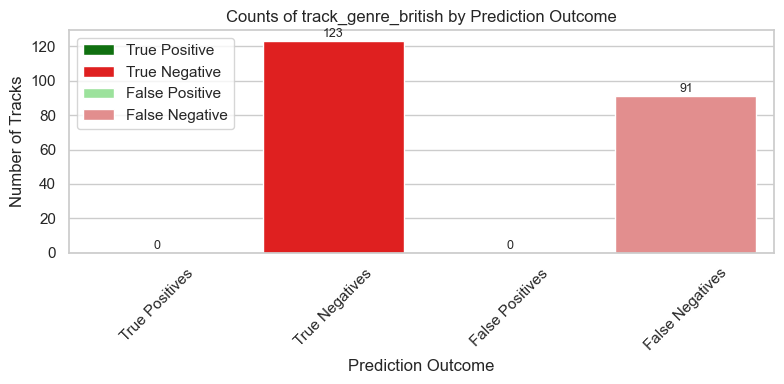

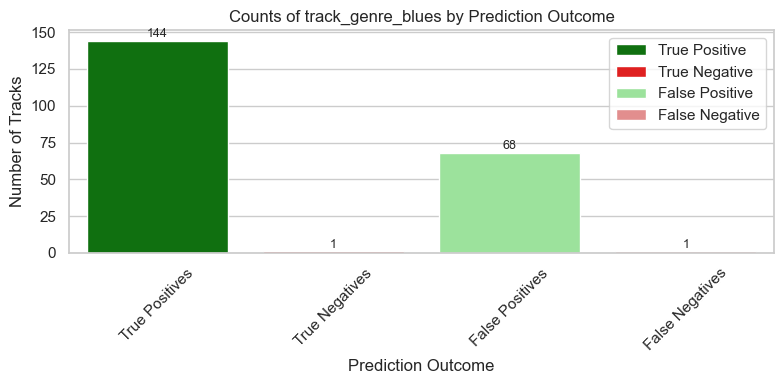

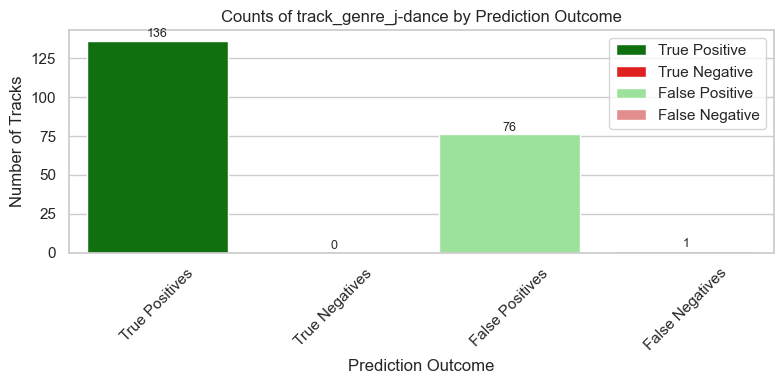

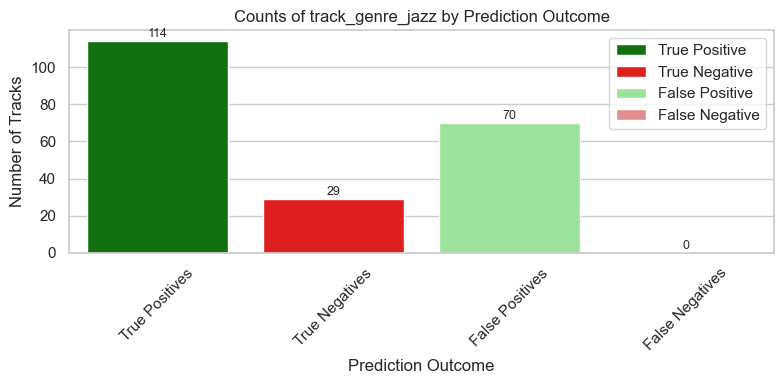

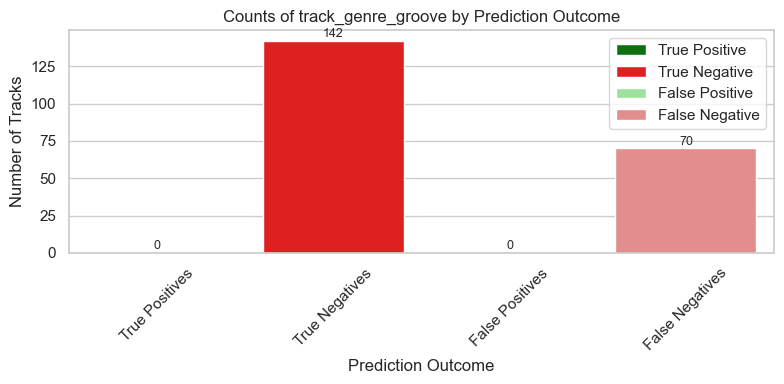

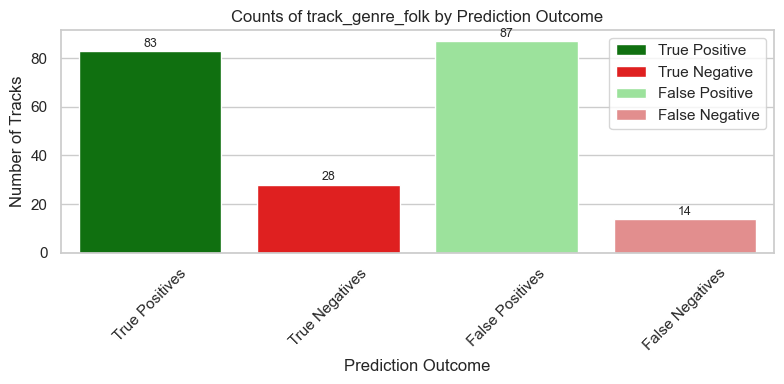

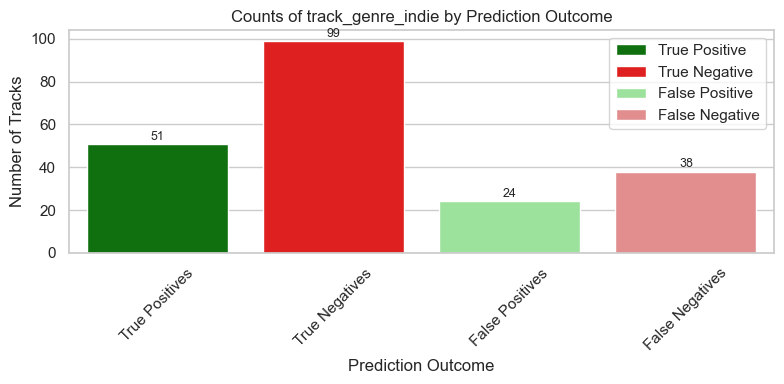

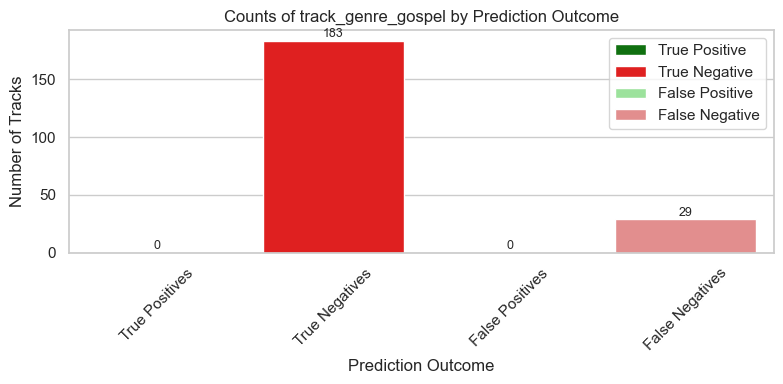

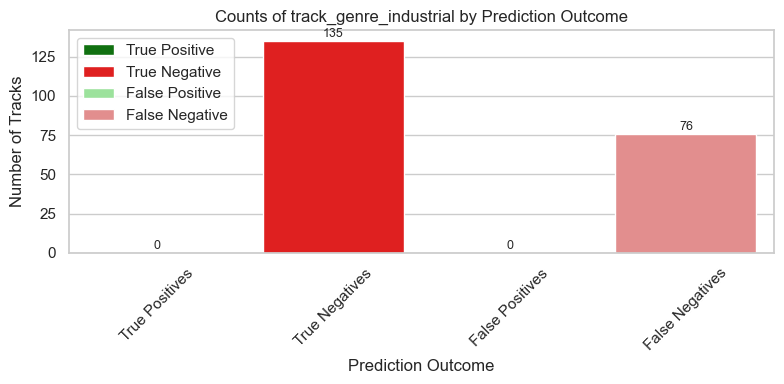

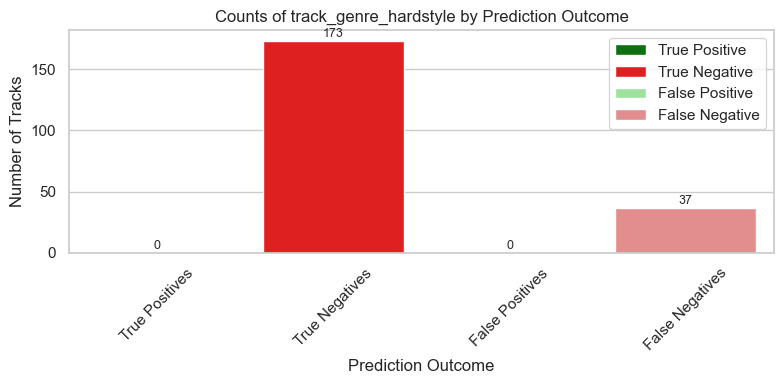

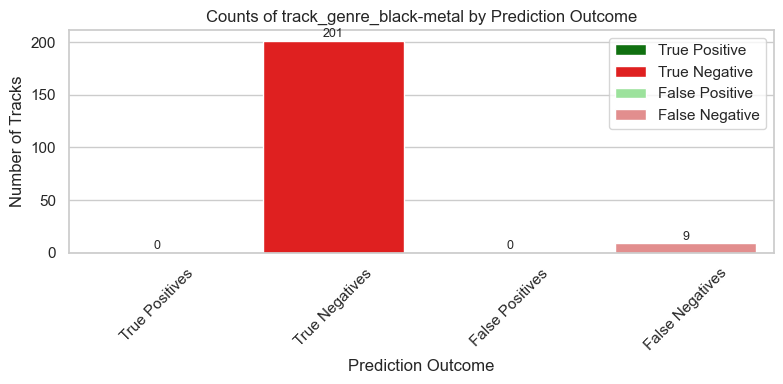

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: prettier style
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 5)

# --- Genre Counts per Prediction Outcome ---

# Ensure genre columns are all 0 or 1
genre_cols = [col for col in df.columns if col.startswith("track_genre")]

# If genre values are probabilities or standardized, convert to binary
for col in genre_cols:
    df[col] = (df[col] > 0.5).astype(int)  # Adjust threshold if needed
    # df[col].apply(pd.Series.unique)

# Define the prediction outcome groups
groups = {
    "True Positives": true_positives,
    "True Negatives": true_negatives,
    "False Positives": false_positives,
    "False Negatives": false_negatives,
}

# Count genres per group
genre_counts = {
    # group_name: group_df[genre_cols].clip(lower=0).sum() for group_name, group_df in groups.items()
    group_name: (group_df[genre_cols] > 0).astype(int).sum()
    for group_name, group_df in groups.items()
}

# genre_matrix = (df[genre_cols] != -0.09407250308929431).astype(int)
# print(genre_matrix)

# Create a DataFrame
genre_counts_df = pd.DataFrame(genre_counts).T  # Outcomes as rows
# genre_counts_df.to_csv('output.csv', index=False)

top_genres = genre_counts_df.sum(axis=0).sort_values(ascending=False).head(20).index

# Plot barplot for each genre
# for genre in genre_counts_df.columns:
for genre in top_genres:
    plt.figure(figsize=(8, 4))
    ax = sns.barplot(
        x=genre_counts_df.index,
        y=genre_counts_df[genre].values,
        hue=["True Positive", "True Negative", "False Positive", "False Negative"],
        palette=["green", "red", "lightgreen", "lightcoral"],
    )

    # Add value labels above bars
    for i, value in enumerate(genre_counts_df[genre].values):
        ax.text(i, value + 0.5, str(int(value)), ha="center", va="bottom", fontsize=9)

    plt.title(f"Counts of {genre} by Prediction Outcome")
    plt.ylabel("Number of Tracks")
    plt.xlabel("Prediction Outcome")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [64]:
# # Optional: for nicer plot styles
# sns.set(style="whitegrid")
# plt.rcParams["figure.figsize"] = (10, 5)

# # df_no_genres = df.loc[:, ~df.columns.str.contains("track_genre")]

# # Features only (adjust as needed)
# feature_cols = [
#     col
#     for col in df.columns
#     if col
#     not in [
#         "target_actual",
#         "target_pred",
#         "track_id",
#         "artists",
#         "album_name",
#         "track_name",
#         "valence",
#     ]
# ]

# print(feature_cols)

# # Mean summary per category
# summary_df = pd.DataFrame(
#     {
#         "False Negatives": false_negatives[feature_cols].mean(),
#         "False Positives": false_positives[feature_cols].mean(),
#         "True Positives": true_positives[feature_cols].mean(),
#         "True Negatives": true_negatives[feature_cols].mean(),
#         # "All Data": df[feature_cols].mean(),
#     }
# )

# # Transpose for easier plotting
# summary_df = summary_df.T


# # --- Comparison Bar Plot for of each genre  ---
# # Choose top 10 most differing features that are ONLY GENRES (by std deviation across groups)
# diff_features = (
#     summary_df.filter(like="track_genre")
#     .std()
#     .sort_values(ascending=False)
#     # .head(10)
#     .index
# )

# for feature in diff_features:
#     summary_df[feature].plot(
#         kind="bar", title=f"{feature} across Prediction Groups", ylabel="Mean Value"
#     )
#     plt.xticks(rotation=45)
#     plt.grid(axis="y")
#     plt.tight_layout()
#     plt.show()